# MaterialsCoord benchmarking – effect of enforcing cation to anion bonding

The performance of several of the near neighbor methods is strongly affected if only cation to anion bonding is considered. The benchmarking object has an option (`cation_anion`) to limit bonds to those between sites of opposing charge. In this notebook, we run the benchmark on all structures and compare the results with and without `cation_anion` set.

*Written using:*
- MaterialsCoord==0.2.0

*Authors: Alex Ganose (03/30/20)*

---

First, lets initialize the near neighbor methods we are interested in.

In [1]:
from pymatgen.analysis.local_env import BrunnerNN_reciprocal, EconNN, JmolNN, \
                                        MinimumDistanceNN, MinimumOKeeffeNN, MinimumVIRENN, \
                                        VoronoiNN, CrystalNN

nn_methods = [
    MinimumDistanceNN(),  MinimumOKeeffeNN(), MinimumVIRENN(), JmolNN(), 
    EconNN(tol=0.5), BrunnerNN_reciprocal(), VoronoiNN(tol=0.5), CrystalNN()
]

Next, import the benchmark and choose which structures we are interested in.

In [2]:
from materialscoord.core import Benchmark

structure_groups = ["common_binaries", "elemental", "A2BX4", "ABX3", "ABX4"]

bm = Benchmark.from_structure_group(structure_groups)

Calculate the scores with and without `cation_anion`.

In [3]:
scores = bm.score(nn_methods)
cation_anion_scores = bm.score(nn_methods, cation_anion=True)

/Users/alex/dev/src/pymatgen/pymatgen/analysis/local_env.py:3951: UserWarning: No oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn(
/Users/alex/dev/src/pymatgen/pymatgen/analysis/local_env.py:3745: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.
  warnings.warn(


Plot the default scores and the `cation_anion` scores.

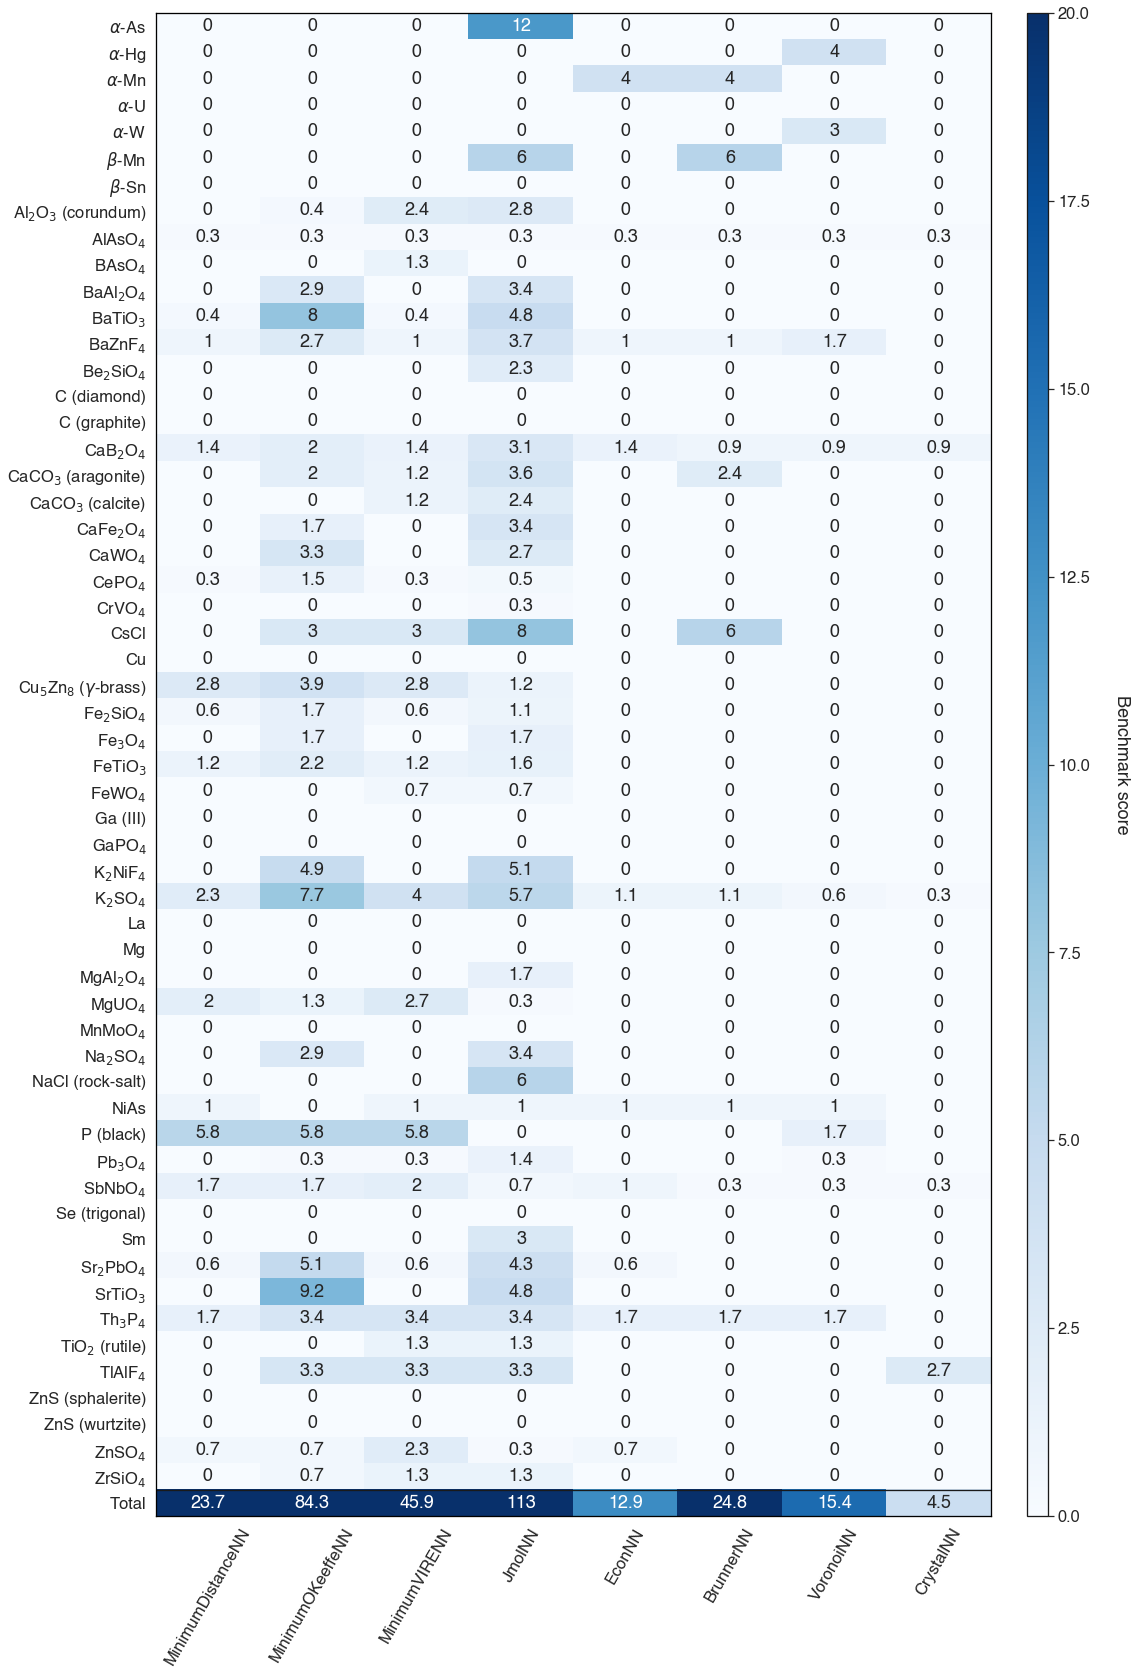

In [4]:
from pathlib import Path

from materialscoord import structure_mapping
from materialscoord.plot import plot_benchmark_scores

nn_method_mapping = {"BrunnerNN_reciprocal": "BrunnerNN"}

plt = plot_benchmark_scores(
    scores, 
    structure_mapping=structure_mapping,
    nn_method_mapping=nn_method_mapping,
    vmax=20
)

plt.savefig(Path("plots", "all-structures.pdf"), bbox_inches='tight')
plt.show()

Plot the scores with `cation_anion` enabled.

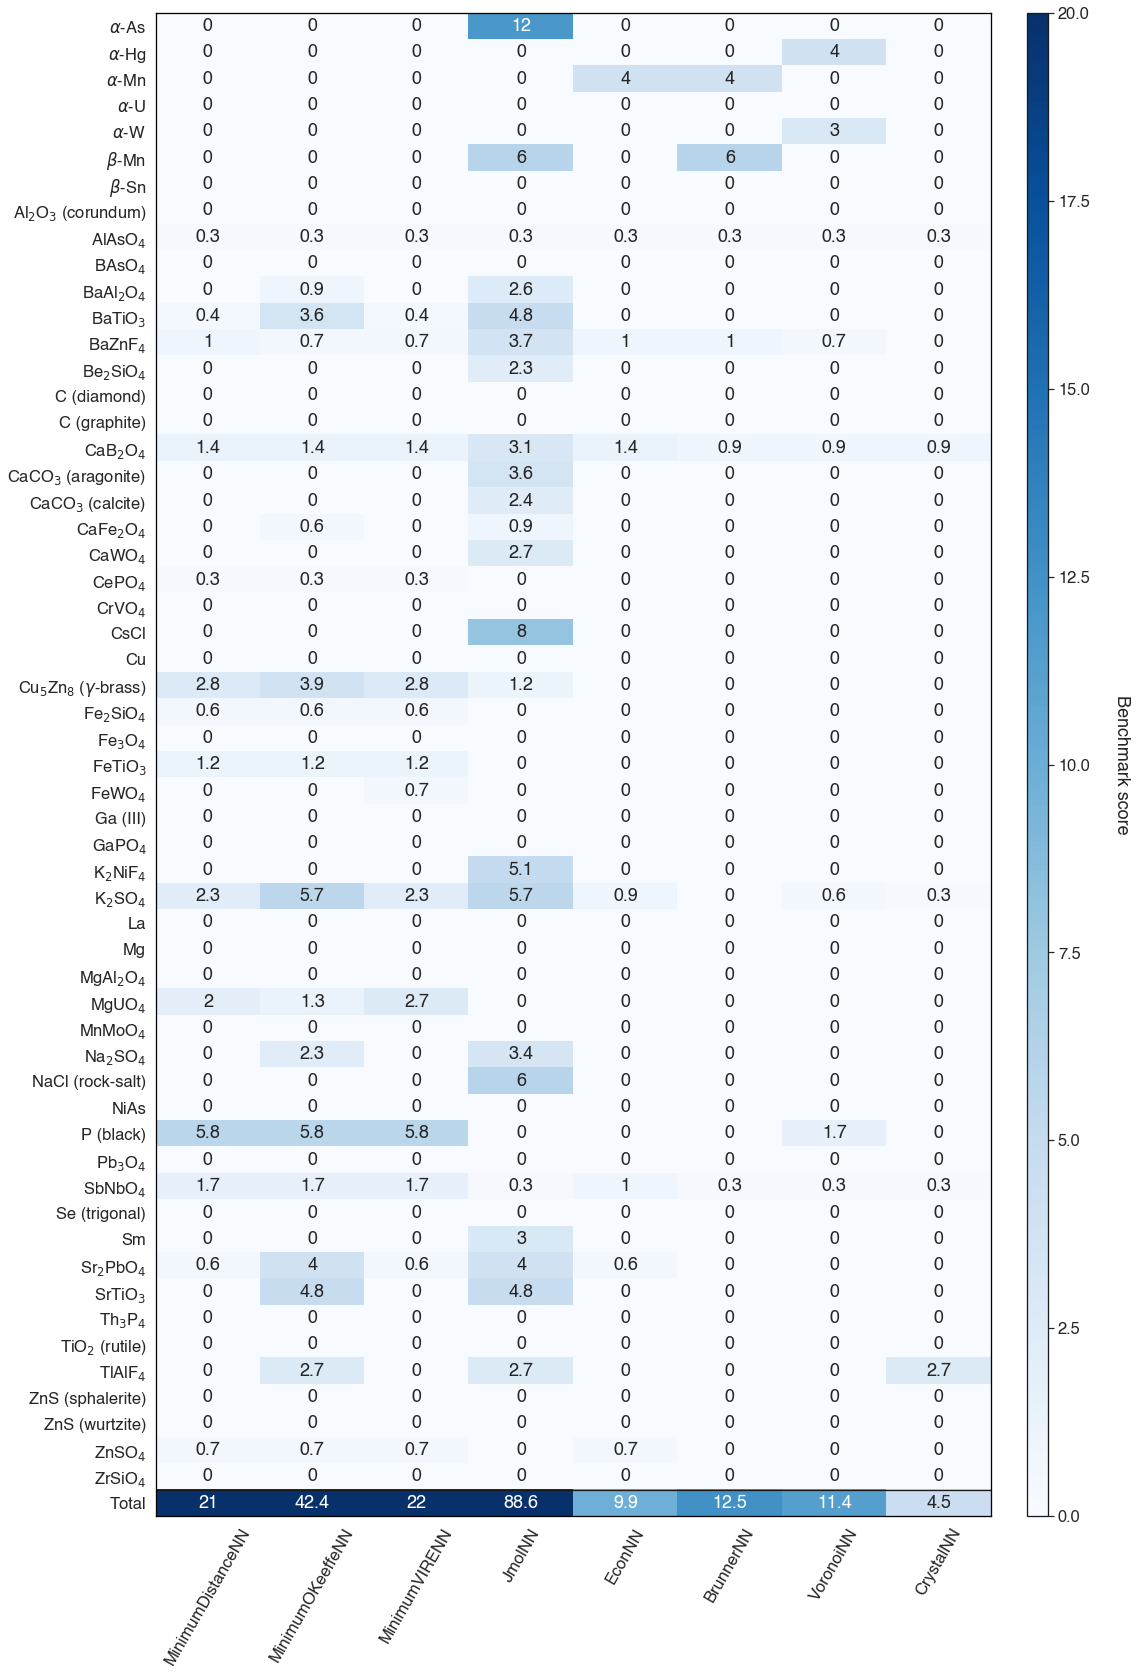

In [5]:
plt = plot_benchmark_scores(
    cation_anion_scores, 
    structure_mapping=structure_mapping,
    nn_method_mapping=nn_method_mapping,
    vmax=20
)

plt.savefig(Path("plots", "all-structures-cation-anion.pdf"), bbox_inches='tight')
plt.show()

Plot the differences between the two sets of scores.

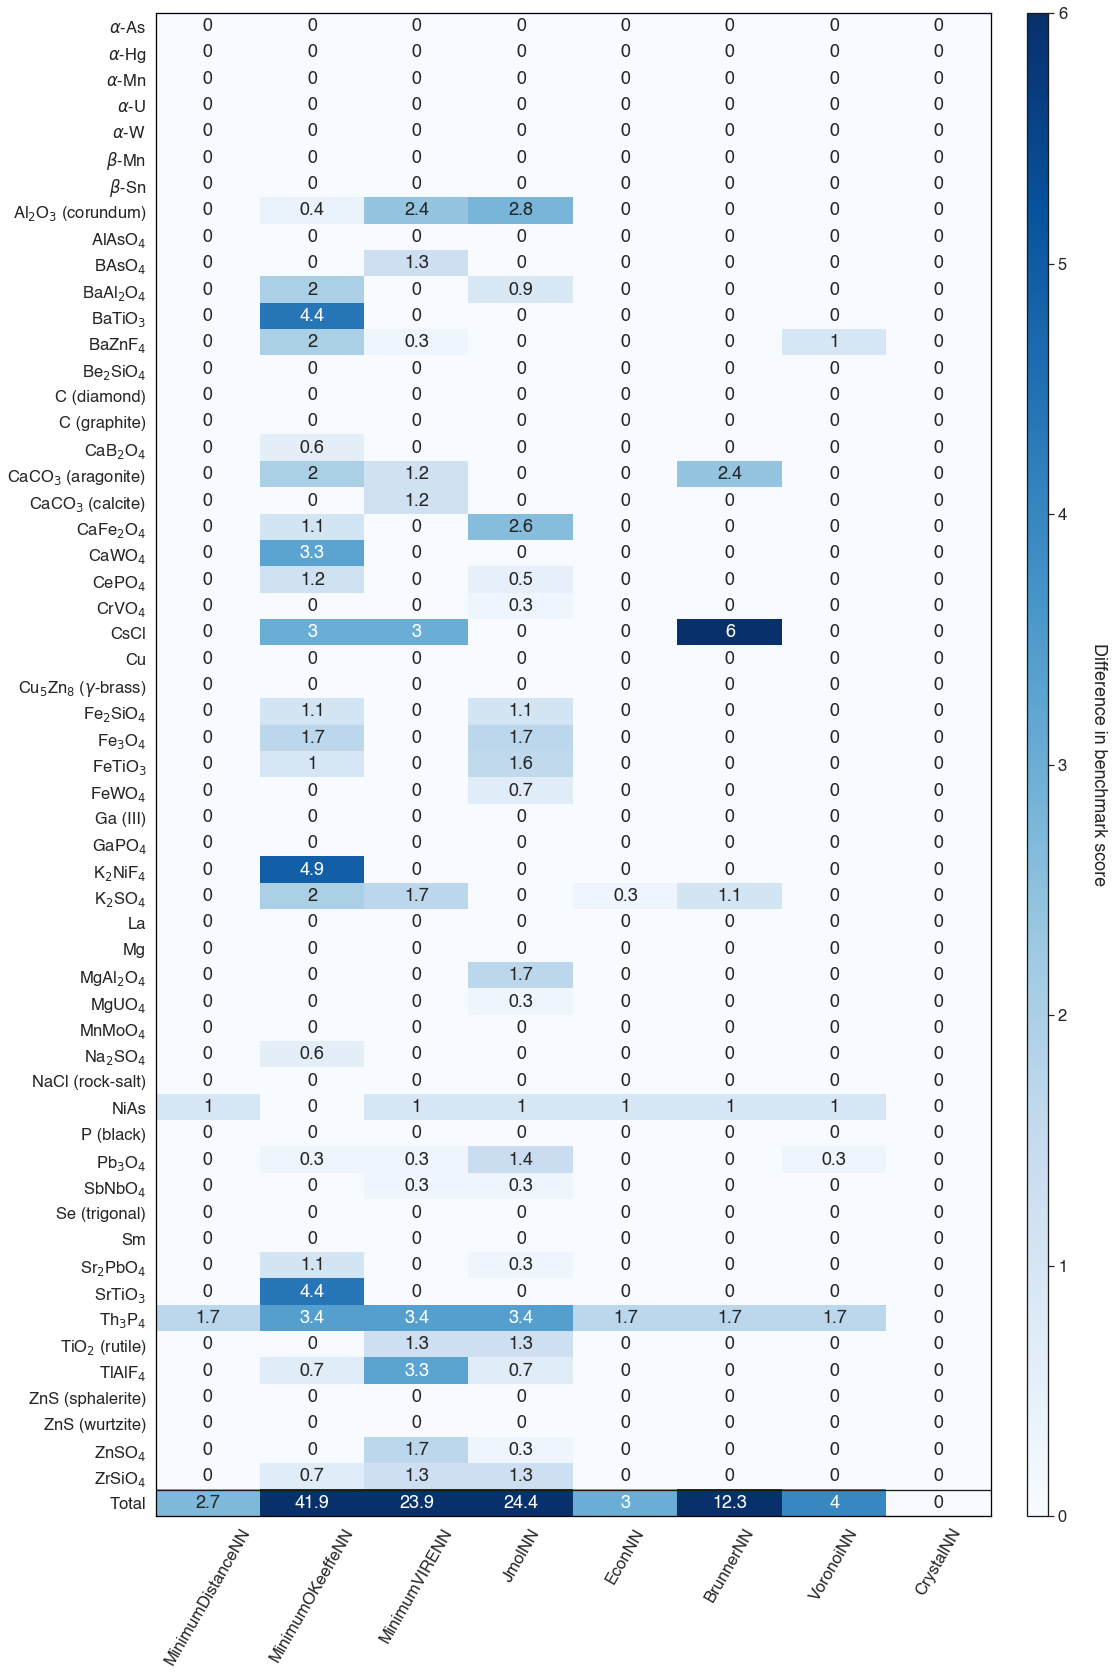

In [6]:
difference = scores - cation_anion_scores

plt = plot_benchmark_scores(
    difference, 
    structure_mapping=structure_mapping,
    nn_method_mapping=nn_method_mapping,
    cbar_label="Difference in benchmark score"
)

plt.savefig(Path("plots", "all-structures-cation-anion-difference.pdf"), bbox_inches='tight')
plt.show()